In [4]:
from konlpy.tag import Mecab
mecab = Mecab() 
print(mecab.pos("네엡"))

[('네', 'IC'), ('엡', 'NNP')]


In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import koreanize_matplotlib

In [6]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/hotel_review_75000.csv",encoding="utf-8")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  75000 non-null  int64  
 1   Unnamed: 0    75000 non-null  int64  
 2   hotelId       75000 non-null  int64  
 3   hotelName     75000 non-null  object 
 4   tripType      75000 non-null  object 
 5   tripTypeText  75000 non-null  object 
 6   reviewDate    75000 non-null  object 
 7   rating        75000 non-null  float64
 8   description   75000 non-null  object 
 9   isKorNot      75000 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(5)
memory usage: 5.2+ MB


In [8]:
data = data.drop(data.iloc[:,0:2],axis=1)

In [9]:
data

,hotelId,hotelName,tripType,tripTypeText,reviewDate,rating,description,isKorNot
0,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 1월 26일,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,True
1,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 2월 4일,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,True
2,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),other,2박 여행,2019년 2월 2일,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,True
3,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),romance,1박 로맨틱 여행,2019년 1월 26일,10.0,가격에 맞게 만족했습니다,True
4,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),with-friends,친구와 1박 여행,2019년 1월 25일,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,True
...,...,...,...,...,...,...,...,...
74995,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,1박 로맨틱 여행,2019년 8월 17일,10.0,조식과 스탠더드 하프전망 신청해서 1박 했는데요ᆢ너무 좋아요ᆢ다만 가격이 좀 나가...,True
74996,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,2박 로맨틱 여행,2018년 11월 30일,8.0,객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...,True
74997,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),family,1박 가족 여행,2019년 12월 4일,8.0,배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...,True
74998,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),other,1박 여행,2019년 5월 2일,8.0,우선 위치가 너무 좋았고 숙소에 짐을 놓고 걸어서 주변 가볼곳도 있고 먹거리도 맛있...,True


In [10]:
data[data["rating"] >= 10]

,hotelId,hotelName,tripType,tripTypeText,reviewDate,rating,description,isKorNot
0,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 1월 26일,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,True
1,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 2월 4일,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,True
2,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),other,2박 여행,2019년 2월 2일,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,True
3,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),romance,1박 로맨틱 여행,2019년 1월 26일,10.0,가격에 맞게 만족했습니다,True
4,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),with-friends,친구와 1박 여행,2019년 1월 25일,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,True
...,...,...,...,...,...,...,...,...
74985,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,1박 로맨틱 여행,2019년 8월 31일,10.0,시설도 꺠끗하고 좋은 호텔입니다,True
74987,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,1박 로맨틱 여행,2019년 8월 24일,10.0,방음 잘 되고 이불이랑 베개가 너무 편했어요 조식은 비싸서 이용 안 했는데 숙소 아...,True
74991,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),family,1박 가족 여행,2019년 8월 17일,10.0,깨끗하고 직원분들 친절해서 좋았어요 한가지 아쉬운 점은 엘리베이터 이용이 너무 불편...,True
74994,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),other,1박 여행,2019년 6월 29일,10.0,혼자 갔는데 깨끗하고 다 좋았습니다,True


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hotelId       75000 non-null  int64  
 1   hotelName     75000 non-null  object 
 2   tripType      75000 non-null  object 
 3   tripTypeText  75000 non-null  object 
 4   reviewDate    75000 non-null  object 
 5   rating        75000 non-null  float64
 6   description   75000 non-null  object 
 7   isKorNot      75000 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 4.1+ MB


<Axes: xlabel='tripType'>

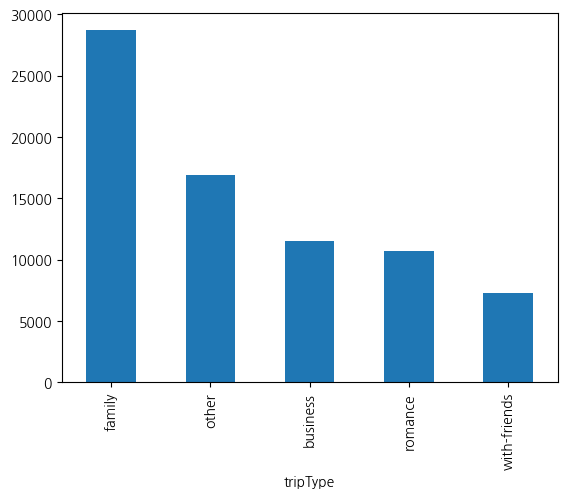

In [12]:
data["tripType"].value_counts().plot(kind="bar")

In [13]:
data["reviewDate"].unique()

array(['2019년 1월 26일', '2019년 2월 4일', '2019년 2월 2일', ..., '2017년 9월 30일',
       '2021년 1월 5일', '2017년 11월 1일'], dtype=object)

In [14]:
data["tripTypeText"].unique()

array(['1박 가족 여행', '2박 여행', '1박 로맨틱 여행', '친구와 1박 여행', '2박 출장', '1박 여행',
       '1박 출장', '2박 가족 여행', '가족 여행', '로맨틱 여행', '친구와 2박 여행', '3박 여행',
       '2박 로맨틱 여행', '3박 가족 여행', '기타', '친구와 여행', '5박 가족 여행', '3박 출장',
       '12박 여행', '4박 출장', '출장', '5박 출장', '5박 여행', '4박 로맨틱 여행', '4박 여행',
       '10박 여행', '6박 출장', '5박 로맨틱 여행', '4박 가족 여행', '친구와 3박 여행',
       '3박 로맨틱 여행', '6박 가족 여행', '11박 출장', '14박 여행', '친구와 4박 여행', '9박 출장',
       '6박 여행', '16박 여행', '친구와 7박 여행', '9박 여행', '26박 출장', '7박 출장',
       '13박 출장', '12박 출장', '8박 가족 여행', '9박 가족 여행', '10박 가족 여행',
       '19박 가족 여행', '9박 로맨틱 여행', '7박 가족 여행', '13박 여행', '8박 여행',
       '22박 가족 여행', '19박 출장', '6박 로맨틱 여행', '13박 가족 여행', '친구와 5박 여행',
       '11박 여행', '친구와 11박 여행', '28박 가족 여행', '친구와 6박 여행', '7박 여행', '8박 출장',
       '14박 출장', '12박 가족 여행', '16박 가족 여행', '21박 가족 여행', '28박 여행',
       '14박 가족 여행', '11박 가족 여행', '15박 가족 여행', '18박 여행', '7박 로맨틱 여행',
       '20박 가족 여행', '10박 출장', '11박 로맨틱 여행', '17박 출장', '27박 출장', '18박 출장',
       '20박 여행', '8박 로맨틱 여행', '1

In [15]:
data["isKorNot"].unique()

array([ True])

In [16]:
data["tripType"].unique()

array(['family', 'other', 'romance', 'with-friends', 'business'],
      dtype=object)

In [17]:
data["hotelName"].unique()

array(['서울 웨스틴조선호텔 (The Westin Chosun Seoul)',
       '그랜드 하얏트 서울 (Grand Hyatt Seoul)',
       '밀레니엄 힐튼 서울 (Millennium Hilton Seoul)', ...,
       '더 스테이 호스텔 (The Stay Hostel)', '이즈미르 펜션 (Izmir Pension)',
       '씨 크루즈 호텔 (Sea Cruise Hotel)'], dtype=object)

In [18]:
data = data.drop(['hotelId','isKorNot','tripTypeText'],axis=1)

In [19]:
data["hotelName"].nunique()

2015

In [20]:
data["tripType"].value_counts()

tripType
family          28680
other           16859
business        11487
romance         10731
with-friends     7243
Name: count, dtype: int64

In [21]:
data["rating"].describe()

count    75000.000000
mean         8.167813
std          2.199348
min          2.000000
25%          8.000000
50%          8.000000
75%         10.000000
max         10.000000
Name: rating, dtype: float64

## 평점 총계 
* 대부분 8-10사이 8 미만이 많이 없음 

/tmp/ipykernel_18333/3169801868.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['rating'])
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_a

<Axes: xlabel='rating', ylabel='Density'>

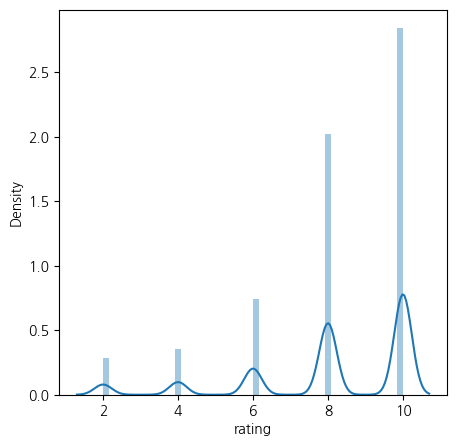

In [22]:
plt.figure(figsize=(5,5))
sns.distplot(data['rating'])

In [23]:
data[data['rating'] <= 6][['description','rating']]

,description,rating
15,가성비 별로였습니다 기대를 많이 했기에 실망도 컸다고 봅니다 예약하고 사전에 메일을...,4.0
30,4번째 이 호텔을 방문하는 것이었습니다 예전에 너무 좋아하는 호텔이었는데 이번엔 실...,6.0
35,서비스 친절도가 프로답지않은 느낌입니다,6.0
41,보통 이뷰 남기지 않는데 처음으로 남겨봅니다 국내외 특급호텔 많이 다녀봤는데 이 곳...,2.0
43,고객을 편안히개 만드는 법을 잘 아는 호텔입니다 오랜 역사가 과연 명불허전 종업원 ...,2.0
...,...,...
74979,송풍기인지 환풍기인지 소음이 너무커서 시끄러웠다난방도 공조시스템으로 되어있는데 작동...,4.0
74982,별로였습니다그냥 비지니스 호텔 같은 느낌이었습니다,6.0
74990,방이 생각보다 작아서 놀랐음성수기이긴 했지만 2박에 30만원 넘는 숙소를 구했는데조...,6.0
74992,우선수건이 비치가 안되어있음수건이 없다는건 청소상태를 확인 안한듯주차구역이 적음 ...,6.0


In [24]:
data.loc[data['rating'] <= 6,['rating','description']]

,rating,description
15,4.0,가성비 별로였습니다 기대를 많이 했기에 실망도 컸다고 봅니다 예약하고 사전에 메일을...
30,6.0,4번째 이 호텔을 방문하는 것이었습니다 예전에 너무 좋아하는 호텔이었는데 이번엔 실...
35,6.0,서비스 친절도가 프로답지않은 느낌입니다
41,2.0,보통 이뷰 남기지 않는데 처음으로 남겨봅니다 국내외 특급호텔 많이 다녀봤는데 이 곳...
43,2.0,고객을 편안히개 만드는 법을 잘 아는 호텔입니다 오랜 역사가 과연 명불허전 종업원 ...
...,...,...
74979,4.0,송풍기인지 환풍기인지 소음이 너무커서 시끄러웠다난방도 공조시스템으로 되어있는데 작동...
74982,6.0,별로였습니다그냥 비지니스 호텔 같은 느낌이었습니다
74990,6.0,방이 생각보다 작아서 놀랐음성수기이긴 했지만 2박에 30만원 넘는 숙소를 구했는데조...
74992,6.0,우선수건이 비치가 안되어있음수건이 없다는건 청소상태를 확인 안한듯주차구역이 적음 ...


In [25]:
data[data['rating']<=6]

,hotelName,tripType,reviewDate,rating,description
15,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,2018년 12월 8일,4.0,가성비 별로였습니다 기대를 많이 했기에 실망도 컸다고 봅니다 예약하고 사전에 메일을...
30,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,2019년 2월 16일,6.0,4번째 이 호텔을 방문하는 것이었습니다 예전에 너무 좋아하는 호텔이었는데 이번엔 실...
35,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,2019년 5월 5일,6.0,서비스 친절도가 프로답지않은 느낌입니다
41,서울 웨스틴조선호텔 (The Westin Chosun Seoul),romance,2018년 11월 4일,2.0,보통 이뷰 남기지 않는데 처음으로 남겨봅니다 국내외 특급호텔 많이 다녀봤는데 이 곳...
43,서울 웨스틴조선호텔 (The Westin Chosun Seoul),other,2018년 2월 14일,2.0,고객을 편안히개 만드는 법을 잘 아는 호텔입니다 오랜 역사가 과연 명불허전 종업원 ...
...,...,...,...,...,...
74979,씨 크루즈 호텔 (Sea Cruise Hotel),business,2018년 11월 21일,4.0,송풍기인지 환풍기인지 소음이 너무커서 시끄러웠다난방도 공조시스템으로 되어있는데 작동...
74982,씨 크루즈 호텔 (Sea Cruise Hotel),with-friends,2018년 11월 13일,6.0,별로였습니다그냥 비지니스 호텔 같은 느낌이었습니다
74990,씨 크루즈 호텔 (Sea Cruise Hotel),family,2019년 8월 15일,6.0,방이 생각보다 작아서 놀랐음성수기이긴 했지만 2박에 30만원 넘는 숙소를 구했는데조...
74992,씨 크루즈 호텔 (Sea Cruise Hotel),family,2019년 8월 17일,6.0,우선수건이 비치가 안되어있음수건이 없다는건 청소상태를 확인 안한듯주차구역이 적음 ...


In [26]:
data.iloc[:,1:2]

,tripType
0,family
1,family
2,other
3,romance
4,with-friends
...,...
74995,romance
74996,romance
74997,family
74998,other


In [27]:
data.loc[data['rating'] <= 6,['rating','description']].loc[74979]['description']

'송풍기인지 환풍기인지 소음이 너무커서 시끄러웠다난방도 공조시스템으로 되어있는데 작동할때 시끄러웠고 여느 모텔과 차이가 없음오히려 최근지어진 모텔이 더좋음'

In [28]:
data['is_good'] = data['rating'].apply(lambda x : 1 if x >= 8 else 0)

<Axes: xlabel='is_good'>

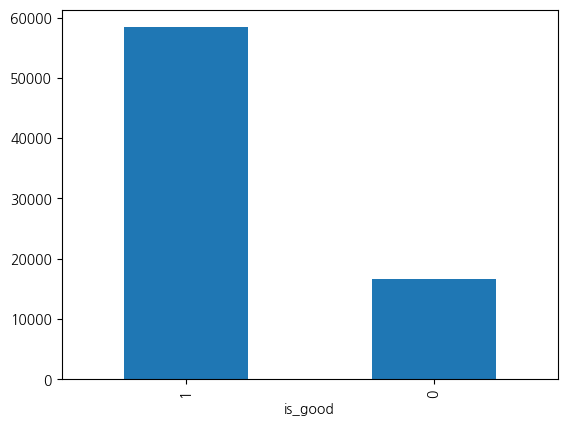

In [29]:
data['is_good'].value_counts().plot(kind="bar")

In [30]:
def filter_good(x):
    if x >= 8 :
        return 1 
    else:
        return 0 

## Konlpy 토큰화 후 빈도 분선가

In [31]:
from konlpy.tag import Mecab
mecab = Mecab() 

In [32]:
print(mecab.nouns(data['description'][0])) # 명사만 일단 뽑아줘

['직원', '서비스', '마인드', '완벽', '노후', '시설', '라운지', '호텔', '이름', '부족']


## 불용어 처리 

## 불용어란?
* 특별한 의미가 없는 단어나 조사 등 
* 있,하,것,들,그 (대명사들) 

In [33]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/%ED%95%9C%EA%B5%AD%EC%96%B4%EB%B6%88%EC%9A%A9%EC%96%B4100.txt",sep="\t",header=None)

In [34]:
stopwords

,0
0,이
1,있
2,하
3,것
4,들
...,...
104,원
105,잘
106,통하
107,소리


In [35]:
stopwords = list(stopwords[0])

In [36]:
stopwords.extend(["호텔"])

In [37]:
stopwords

['이',
 '있',
 '하',
 '것',
 '들',
 '그',
 '되',
 '수',
 '왜',
 '뭐',
 '거',
 '해',
 '저',
 '너',
 '건',
 '은',
 '걸',
 '진짜',
 '보',
 '않',
 '없',
 '나',
 '사람',
 '주',
 '아니',
 '등',
 '같',
 '우리',
 '때',
 '년',
 '가',
 '한',
 '지',
 '대하',
 '오',
 '말',
 '일',
 '그렇',
 '위하',
 '때문',
 '그것',
 '두',
 '말하',
 '알',
 '그러나',
 '받',
 '못하',
 '일',
 '그런',
 '또',
 '문제',
 '더',
 '사회',
 '많',
 '그리고',
 '좋',
 '크',
 '따르',
 '중',
 '나오',
 '가지',
 '씨',
 '시키',
 '만들',
 '지금',
 '생각하',
 '그러',
 '속',
 '하나',
 '집',
 '살',
 '모르',
 '적',
 '월',
 '데',
 '자신',
 '안',
 '어떤',
 '내',
 '내',
 '경우',
 '명',
 '생각',
 '시간',
 '그녀',
 '다시',
 '이런',
 '앞',
 '보이',
 '번',
 '나',
 '다른',
 '어떻',
 '여자',
 '개',
 '전',
 '들',
 '사실',
 '이렇',
 '점',
 '싶',
 '말',
 '정도',
 '좀',
 '원',
 '잘',
 '통하',
 '소리',
 '놓',
 '호텔']

## 명사부터 분리

In [38]:
nouns_list = []

for i in data["description"]:
    nouns_list.append(mecab.nouns(i))

In [39]:
clean_text = []
for j in nouns_list:
    if j not in stopwords:
        clean_text.append(j)

In [40]:
clean_text

[['직원', '서비스', '마인드', '완벽', '노후', '시설', '라운지', '호텔', '이름', '부족'],
 ['웨스틴', '조선', '면', '최고', '숙소', '생각', '분위기', '편의', '직원', '친절', '인상'],
 ['서울',
  '시내',
  '호',
  '수',
  '곳',
  '아침',
  '뷔페',
  '곳',
  '룸서비스',
  '요구',
  '사항',
  '응대',
  '원',
  '친절',
  '곳',
  '수영장',
  '사람'],
 ['가격', '만족'],
 ['처음',
  '명',
  '셋',
  '점',
  '직원',
  '친절',
  '서비스',
  '맘',
  '시설',
  '불편',
  '추가',
  '커피',
  '서비스',
  '젓가락'],
 ['서비스',
  '최고',
  '요수',
  '영장',
  '사우나',
  '이용',
  '수',
  '토요일',
  '오후',
  '집회',
  '때문',
  '주변',
  '혼잡'],
 ['최고', '위치', '서비스', '관리', '시설', '만족'],
 ['명동', '그제', '큐티', '브룸', '서비스', '친절'],
 ['위치', '룸', '컨디션', '조', '식부', '폐', '음식', '퀄리티'],
 ['중심', '새벽', '차량', '소음', '점', '히터', '때문', '객실', '건조', '편', '점', '제외', '만족'],
 ['위치', '친절'],
 ['서울', '도심', '위치', '직원', '친절', '시설', '밥'],
 ['크리스마스', '숙박', '편안'],
 ['주니어',
  '스위트',
  '더블',
  '침대',
  '잠',
  '수',
  '시청',
  '앞',
  '스케이트장',
  '뷰',
  '직원',
  '친절',
  '기분',
  '사우나'],
 ['침대', '편안', '주변', '동네'],
 ['가성',
  '별로',
  '기대',
  '실망',
  '예약',
  '사전',
  '메일',
  '직원',

## 강의 해설 

In [41]:
data["tokenized_description"] = data["description"].apply(mecab.nouns)

In [42]:
all_wordList = [] 
for i in data["tokenized_description"]:
    for j in i:
        if j not in stopwords:
            all_wordList.append(j)
        else:
            continue

In [43]:
len(all_wordList)

848907

## Nltk를 이용한 단어 빈도 분석하기 

In [44]:
from nltk.probability import FreqDist

In [45]:
FreqDist(all_wordList)

FreqDist({'방': 13963, '친절': 13472, '만족': 13058, '시설': 11505, '직원': 11089, '조식': 11004, '이용': 10289, '위치': 9001, '객실': 8717, '주변': 8010, ...})

## 워드클라우드

In [46]:
from wordcloud import WordCloud

In [49]:
wc =  WordCloud(
    font_path=font_path,
    width=600,
    height=600,
    max_words=20000,
    background_color='white'
).generate(str(all_wordList))



In [48]:
font_path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Black.ttc"

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis('off')

## 긍정 댓글 / 부정 댓글 나누어 클라우드 생성하기 
* rating이 8이상인 사용자 리뷰는 GOOD에 
* rating이 7이하인 사용자 리뷰는 Bad에 나누어 넣어 워드 클라우드 생성

(-0.5, 399.5, 399.5, -0.5)

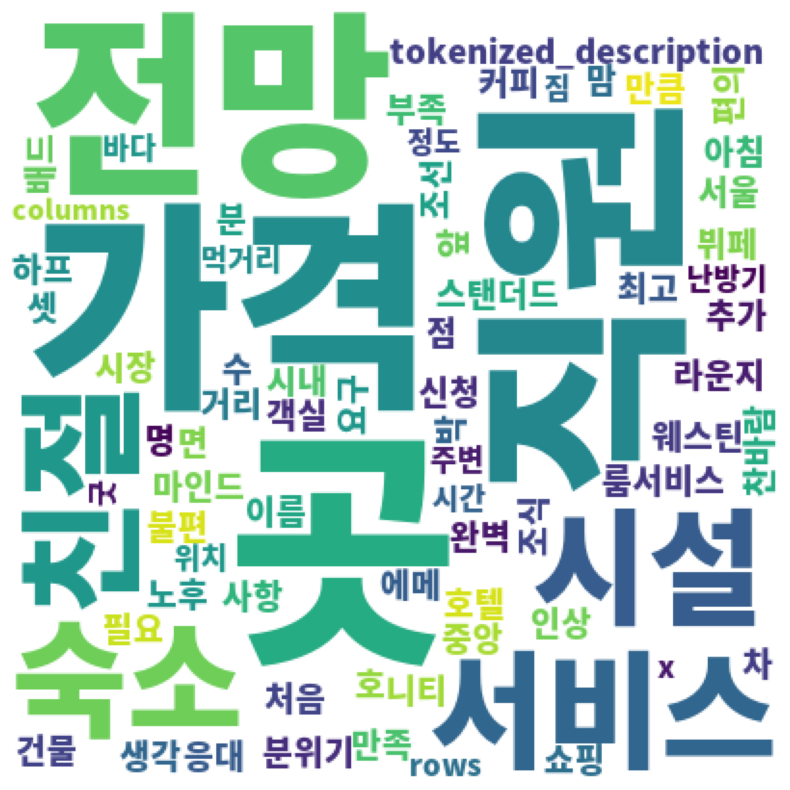

In [50]:
good = data.loc[data["rating"] >=8,['tokenized_description']]
wc =  WordCloud(
    font_path=font_path,
    width=400,
    height=400,
    max_words=20000,
    background_color='white'
).generate(str(good))


plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis('off')

In [51]:
bad = data.loc[data["rating"]<=7,['tokenized_description']]

(-0.5, 399.5, 399.5, -0.5)

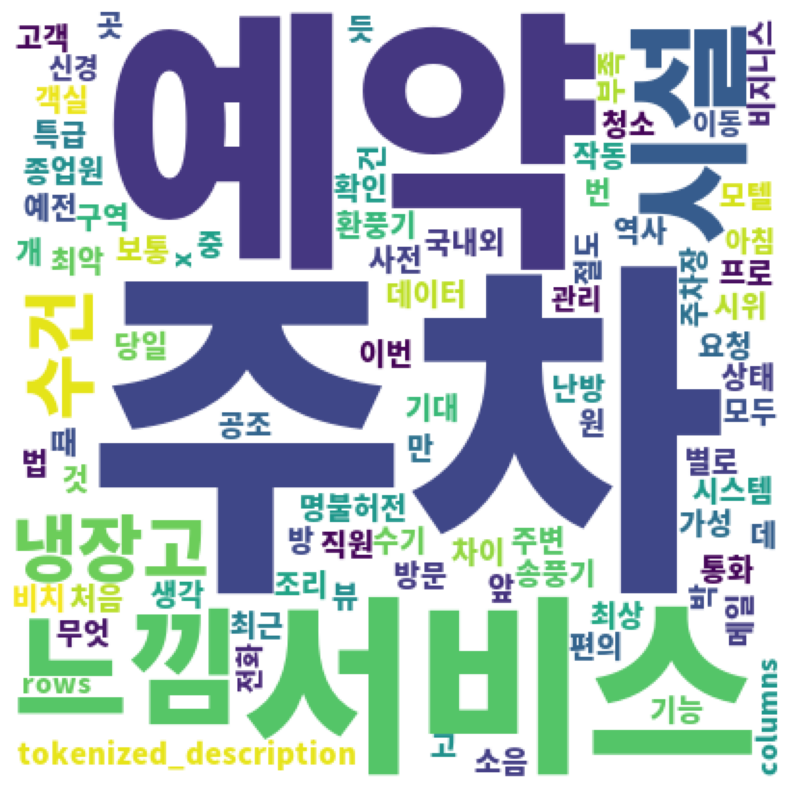

In [52]:
wc =  WordCloud(
    font_path=font_path,
    width=400,
    height=400,
    max_words=15000,
    background_color='white',
    stopwords = ['숙소','숙박','호텔','실망']
).generate(str(bad))

plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis('off')


In [53]:
data[data["description"].str.contains("절도")]["description"]

1        웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...
4        처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...
35                                   서비스 친절도가 프로답지않은 느낌입니다
90                                직원들 친절도 높음케이블 요청에도 빠른 응대
122      5성급호텔 답게 직원분들의 친절도 객실 청소와 같은 서비스와 객실컨디션과 어메니티도...
                               ...                        
74217    일본의 그레이스리호텔경험을 고려하여 숙박을 결정하였으나 기대이하였습니다시용하는 비품...
74389                         뷰 맛집 객실도 깨끗해서 좋았음 직원들 친절도는 좀
74581    체크인체크아웃 시설에 대한 문의시 및 식당에서 직원들의 친절도가 좋았음시설도 전반적...
74630    가격이 다소 부담스럽긴 했는데 레노베이션 한지 얼마안되서 깨끗하고 모든 시설이 다 ...
74854    보일러 실이 따로 있어서 온돌 및 실내온도 조절도 수월했고 전체적으로 신축이라 가구...
Name: description, Length: 540, dtype: object

In [54]:
for i in data.loc[(data["description"].str.contains("주차"))&(data["is_good"]==0),"description"]:
    print(i)
    print()

해외에서  이용 시 만족했던 그랜드하얏트라 우리나라도 한번 예약해봤던 곳이나 체크인 시 안내 받았던 룸과 클럽라운지에서 대기하며 안내받은 룸이 달라 문의하였지만 적극적으로 확인해주거나 응대하지 않아 불쾌했으며 라운지 이용시간 및 부대시설이용에 대한 설명이 부족했고 직원에서 라운지 이브닝타임을 문의했었는데 한명은 5시로 5시에 준비가 안되어 다른 직원에게 문의하니 6시로 안내받았습니다 그밖에도 여러가지로 불편했으며 투숙객임에도 유료주차라는 것은 개선이 되었으면 합니다 유료주차는 처음이라하니 아니라고 요즘호텔은 거의 유료라며 직원은 마치 호텔을 많이 이용 안하는 손님이라는 생각으로 말하는 뉘앙스로 응대하고 더구나 차량 등록을 했음에도 출차시 차단 바가 열리지 않는 등 5성급 호텔 수준은 아닌 듯 합니다 재방문의사는 당연히 없습니다 게스트 서비스나 룸서비스 요청 시 응대는 빨랐습니다

1 다른 호텔과 구별되는 룸의 특징이라면 침대 공간은 넓게 잡은 반면 화장실과 욕조 공간을 좁게 잡아서 이용이 다소 불편할 정도라는 점입니다 청결도는 좋았지만 룸에 거울이 너무 많이 붙어 있어서 다소 산만하고 어지러운 느낌을 줍니다 아마도 상대적으로 룸을 넓게 보이도록 효과를 주고자 한 것 같은데 처음 잠깐만 그런 인상을 주고 오래 있으면 산만합니다2 책상 하나도 없는 룸은 요즘 룸 추세와는 다소 다르네요3 주차비도 유료입니다 물론 투숙객 할인은 있지만 다소 이해가 되지 않습니다4 코로나때문이라고는 하는데 피트니스에서 운동복도 대여해 주지 않는다고 하더군요 그런 중요한 정책의 변화는 사전에 미리 공지가 되어야고객들에게 개별적으로 알려주지는 않더라도 적어도 호텔 홈페이지나 세부정책 부분에는 소개가 되어 있어야 한다고 생각합니다 마땅할텐데 아무런 사전 고지가 없어서 결국 호텔에 묵으면서 시설을 제대로 이용할 수 없었습니다 근래 계속 다른 호텔도 묵어 보았는데 코로나 때문에 운동복을 대여해주지 않는 호텔은 여기가 처음이었습니다5 원래 메뉴에 없음에도 고기를 먹지 않는 손님을 위해 신속하게 

In [55]:
data.loc[data["description"].str.contains("주차"),['tripType','description']]

,tripType,description
61,other,음식도 맛있고 깨끗하고 좋아요명동에서 가깝고 가격도 좋고 친절하고 주차도 좋도 오...
80,family,주차장진입이 좀 어렵지만 역사가 있는 오랜호텔이라 그러련했습니다 객실컨디션과 직원응...
114,other,5성급이라 그런지 서비스가 훌륭합니다모든 직원분들이 친절하시고 객실상태도 최고입니다...
116,other,체크인때 주차부터 모든 직원분들이 친절하셨고 쾌적하게 잘 지내고 왔습니다
178,other,주차장이 살짝 거리가 있어서 발렛이 아니면 좀 걸어야하는 점 투숙객에 주차비를 받는...
...,...,...
74990,family,방이 생각보다 작아서 놀랐음성수기이긴 했지만 2박에 30만원 넘는 숙소를 구했는데조...
74992,family,우선수건이 비치가 안되어있음수건이 없다는건 청소상태를 확인 안한듯주차구역이 적음 ...
74993,family,ㆍ새로 지은 호텔이라 전반적 상태는 좋아요ㆍ옆에 고층건물이 올라와서 오션뷰는 오션뷰...
74995,romance,조식과 스탠더드 하프전망 신청해서 1박 했는데요ᆢ너무 좋아요ᆢ다만 가격이 좀 나가...


In [56]:
for k,j in zip(data.loc[data["description"].str.contains("주차"),'tripType'].value_counts().index,data.loc[data["description"].str.contains("주차"),'tripType'].value_counts()):
    print(k,j)

family 2052
other 1114
romance 763
business 627
with-friends 325


## 나이브 베이즈 분류 알고리즘 활용 
* 텍스트 감성 분석

In [57]:
X = data["description"]
y = data["is_good"]

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
cv = CountVectorizer(lowercase=False)
cv.fit(X)
X = cv.transform(X)

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [61]:
y.value_counts()

is_good
1    58386
0    16614
Name: count, dtype: int64

## 나이브 베이즈로 분석 

In [62]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB() 
model.fit(X_train,y_train)
naive_pred = model.predict(X_test)

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [64]:
print(accuracy_score(y_test,naive_pred))
print(confusion_matrix(y_test,naive_pred))
print(classification_report(y_test,naive_pred))

0.8551555555555556
[[ 2766  2300]
 [  959 16475]]
              precision    recall  f1-score   support

           0       0.74      0.55      0.63      5066
           1       0.88      0.94      0.91     17434

    accuracy                           0.86     22500
   macro avg       0.81      0.75      0.77     22500
weighted avg       0.85      0.86      0.85     22500



/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

### 랜덤 포레스트

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rfc = RandomForestClassifier(max_depth=5,n_estimators=1000,n_jobs=-1,random_state=10)
rfc.fit(X_train,y_train)
rfc_pred= rfc.predict(X_test)

print(accuracy_score(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.7748444444444444
[[    0  5066]
 [    0 17434]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5066
           1       0.77      1.00      0.87     17434

    accuracy                           0.77     22500
   macro avg       0.39      0.50      0.44     22500
weighted avg       0.60      0.77      0.68     22500



/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

## 랜덤서치 하이퍼 파마리터 튜닝

In [67]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [68]:
params = dict(max_depth=[3,5,10],n_estimators=[100,500,1000],criterion=['gini','entropy','log_loss'])
params

{'max_depth': [3, 5, 10],
 'n_estimators': [100, 500, 1000],
 'criterion': ['gini', 'entropy', 'log_loss']}

In [69]:
rand_cv = RandomizedSearchCV(rfc,param_distributions=params,cv=5,n_jobs=-1,random_state=10)
rand_cv.fit(X_train,y_train)
rand_pred = rand_cv.predict(X_test)

print(sorted(rand_cv.cv_results_.keys()))
print('최적하이퍼 파라미터: ', rand_cv.best_params_)
print(f'최고예측 정확도:{rand_cv.best_score_:.4f}')

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_criterion', 'param_max_depth', 'param_n_estimators', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
최적하이퍼 파라미터:  {'n_estimators': 500, 'max_depth': 10, 'criterion': 'gini'}
최고예측 정확도:0.7800


In [70]:
rfc = RandomForestClassifier(max_depth=10,n_estimators=500,n_jobs=-1,random_state=10)
rfc.fit(X_train,y_train)
rfc_pred= rfc.predict(X_test)

print(accuracy_score(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.7748444444444444
[[    0  5066]
 [    0 17434]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5066
           1       0.77      1.00      0.87     17434

    accuracy                           0.77     22500
   macro avg       0.39      0.50      0.44     22500
weighted avg       0.60      0.77      0.68     22500



/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

### 데이터 증폭 / 축소 후 하이퍼 파라미터 튜닝 / 최종모델 만들기

### 데이터 증폭 

In [71]:
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [74]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
X_res,y_res = sm.fit_resample(X_train,y_train)


## ww

In [75]:
rand_cv = RandomizedSearchCV(rfc,param_distributions=params,cv=5,n_jobs=-1,random_state=10)
rand_cv.fit(X_res,y_res)
rand_pred = rand_cv.predict(X_test)

print('최적하이퍼 파라미터: ', rand_cv.best_params_)
print(f'최고예측 정확도:{rand_cv.best_score_:.4f}')

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

최적하이퍼 파라미터:  {'n_estimators': 500, 'max_depth': 10, 'criterion': 'gini'}
최고예측 정확도:0.7479


In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train,y_train)

In [76]:
rfc = RandomForestClassifier(max_depth=10,n_estimators=500,n_jobs=-1,random_state=10,criterion='gini')
rfc.fit(X_res, y_res)
rfc_pred= rfc.predict(X_test)

print(accuracy_score(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

0.8038222222222222
[[ 3824  1242]
 [ 3172 14262]]
              precision    recall  f1-score   support

           0       0.55      0.75      0.63      5066
           1       0.92      0.82      0.87     17434

    accuracy                           0.80     22500
   macro avg       0.73      0.79      0.75     22500
weighted avg       0.84      0.80      0.81     22500



In [77]:
y_res.value_counts()

is_good
1    40952
0    40952
Name: count, dtype: int64

## TfidVectorizer 

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [79]:
from konlpy.tag import Mecab

In [80]:
X2 = data["description"]
y2 = data["is_good"]

In [81]:
mecab = Mecab() 

In [82]:
def tw_tokenizer(text):
    tokens_ko = mecab.morphs(text)
    return tokens_ko

In [84]:
tfidfv = TfidfVectorizer(tokenizer=tw_tokenizer,ngram_range=(1,2),min_df=3,max_df=0.9,lowercase=False)

In [85]:
X2 = tfidfv.fit_transform(X2)

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [89]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,random_state=10,test_size=0.3)

In [92]:
model_tfidv = MultinomialNB()
model_tfidv.fit(X_train2,y_train2)
tfidv_pred = model_tfidv.predict(X_test2)

print(accuracy_score(y_test2,tfidv_pred))
print(classification_report(y_test2,tfidv_pred))

0.8370666666666666
              precision    recall  f1-score   support

           0       0.89      0.31      0.46      5066
           1       0.83      0.99      0.90     17434

    accuracy                           0.84     22500
   macro avg       0.86      0.65      0.68     22500
weighted avg       0.85      0.84      0.81     22500



## ONE SIDE SELECTION 

In [93]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import OneSidedSelection

oss = OneSidedSelection(random_state=42)
X_res3,y_res3 = oss.fit_resample(X_train,y_train)

In [94]:
rand_cv = RandomizedSearchCV(rfc,param_distributions=params,cv=5,n_jobs=-1,random_state=10)
rand_cv.fit(X_res3,y_res3)
rand_pred = rand_cv.predict(X_test)

print('최적하이퍼 파라미터: ', rand_cv.best_params_)
print(f'최고예측 정확도:{rand_cv.best_score_:.4f}')

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/icucheol/.conda/envs/myvenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

최적하이퍼 파라미터:  {'n_estimators': 500, 'max_depth': 10, 'criterion': 'gini'}
최고예측 정확도:0.7799


In [95]:
rfc = RandomForestClassifier(max_depth=10,n_estimators=500,n_jobs=-1,random_state=10,criterion='gini')
rfc.fit(X_res3, y_res3)
rfc_pred= rfc.predict(X_test)

print(accuracy_score(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

0.7748888888888888
[[    1  5065]
 [    0 17434]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      5066
           1       0.77      1.00      0.87     17434

    accuracy                           0.77     22500
   macro avg       0.89      0.50      0.44     22500
weighted avg       0.83      0.77      0.68     22500

